In [0]:
# http://cb.lk/covid_19

In [2]:
!wget http://cb.lk/covid_19

--2020-05-07 16:52:01--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-05-07 16:52:01--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-05-07 16:52:02--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.9.1, 2620:100:601f:1::a27d:901
Connecting to www.dropbox.com (www.dropbox.com)|162.125.9.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-05-07 16:52:02--  https://www.dropbox.com/s/raw/7rjw

In [3]:
!unzip covid_19

Archive:  covid_19
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg  
  inflating: CovidDataset/Val/Covid/6b44464d-73a7-4cf3-bbb6-ffe7

In [0]:
TRAIN_PATH = "CovidDataset/Train"
VALID_PATH = "CovidData/Val"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.vgg16 import VGG16


Using TensorFlow backend.


In [0]:
model = Sequential()
model.add(Conv2D(32 , kernel_size = (3,3) , activation = 'relu' , kernel_initializer = 'he_normal' , input_shape = (224,224,3)))
model.add(Conv2D(64 , kernel_size = (3,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64 , kernel_size = (3,3) , activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128 , kernel_size=(3,3) ,activation = 'relu' ))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(512 , kernel_size = (3,3) , activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64 , activation = 'relu' ))
model.add(Dropout(0.5))
# model.add(Dense(32 , activation = 'relu'))
# model.add(Dropout(0.5))
model.add(Dense(1 , activation = 'sigmoid'))



In [83]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 54, 54, 64)       

In [0]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [0]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])


In [0]:
# Train from Scratch

train_datagenerator = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagenerator = ImageDataGenerator(rescale = 1./255)

In [87]:
train_generator = train_datagenerator.flow_from_directory(
    'CovidDataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 224 images belonging to 2 classes.


In [88]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [89]:
valid_datagenerator = test_datagenerator.flow_from_directory(
    "CovidDataset/Val",
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [90]:
valid_datagenerator.class_indices

{'Covid': 0, 'Normal': 1}

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=2,restore_best_weights=True)

In [94]:
fit_model = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 15,
    callbacks = [monitor],
    validation_data = valid_datagenerator,
    validation_steps = 2
)

Epoch 1/15
8/8 [==============================] - 69s 9s/step - loss: 0.1236 - accuracy: 0.9492 - val_loss: 0.0544 - val_accuracy: 0.9833
Epoch 2/15
8/8 [==============================] - 70s 9s/step - loss: 0.0873 - accuracy: 0.9883 - val_loss: 0.0600 - val_accuracy: 0.9667
Epoch 3/15
8/8 [==============================] - 69s 9s/step - loss: 0.1031 - accuracy: 0.9648 - val_loss: 0.0594 - val_accuracy: 0.9667
Epoch 4/15
8/8 [==============================] - 68s 9s/step - loss: 0.1096 - accuracy: 0.9570 - val_loss: 0.0537 - val_accuracy: 0.9833
Epoch 5/15
8/8 [==============================] - 68s 9s/step - loss: 0.1362 - accuracy: 0.9414 - val_loss: 0.0762 - val_accuracy: 0.9667
Epoch 6/15
8/8 [==============================] - 70s 9s/step - loss: 0.1226 - accuracy: 0.9688 - val_loss: 0.1366 - val_accuracy: 0.9500
Epoch 00006: early stopping


In [0]:
# fit_model = model.fit_generator(
#     train_generator,
#     steps_per_epoch = 8,
#     epochs = 4,
#     validation_data = valid_datagenerator,
#     validation_steps = 2,
# )

In [0]:
model.save("model_xray.h5")


In [0]:
model = load_model("model_xray.h5")
import os
import seaborn as sns

In [0]:
y_actual = []
y_test = []

for i in os.listdir("./CovidDataset/Val/Normal/"):
  img = image.load_img("./CovidDataset/Val/Normal/"+i , target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis =0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [0]:
for i in os.listdir("./CovidDataset/Val/Covid/"):
  img = image.load_img("./CovidDataset/Val/Covid/"+i , target_size = (224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img , axis =0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [0]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
confusion_matrix = confusion_matrix(y_actual , y_test)

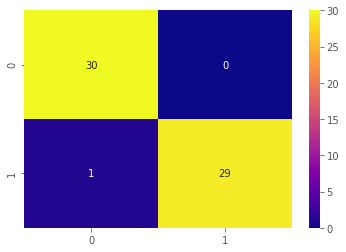

In [103]:
sns.heatmap(confusion_matrix , cmap = 'plasma' , annot = True)

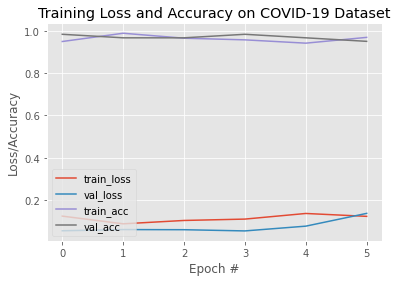

In [106]:
N = 6
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), fit_model.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), fit_model.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), fit_model.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), fit_model.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
# plt.savefig(args["plot"])